In [3]:
import plotly

plotly.io.orca.config.executable = "/home/seyma/anaconda3/bin/orca"
plotly.io.orca.config.save()

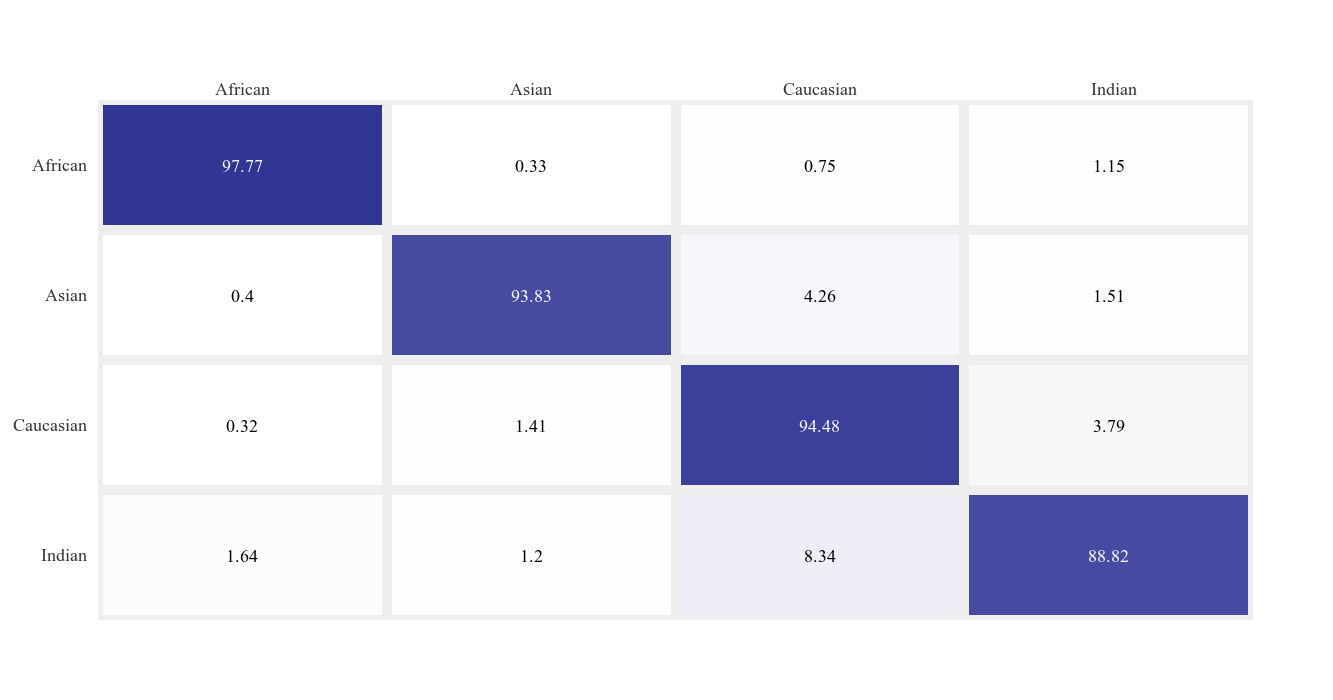

In [25]:
"""
confusion matrix generator wit plotly express
@todo: not looks elegant create colorscale
"""
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
from optparse import OptionParser
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)

# from input file or arrays
def draw_confusion_matrix(prediction, label, output_file):
    if type(prediction) == str and type(label) == str:
        y_pred = np.load(prediction)
        y_true = np.load(label)
    if isinstance(prediction, np.ndarray) and isinstance(label, np.ndarray):
        y_true, y_pred = label, prediction

    z = confusion_matrix(y_true, y_pred)
    z_normalized = z.astype("int") / z.sum(axis=1)[:, np.newaxis] * 100
    z_normalized = np.around(z_normalized, decimals=2)
    np.savetxt(output_file[-2:] + "cf.csv", z_normalized)

    x = ["African", "Asian", "Caucasian", "  Indian"]
    y = ["African", "Asian", "Caucasian", "  Indian"]
    fig = ff.create_annotated_heatmap(
        z,
        x=x,
        y=y,
        xgap=10,
        ygap=10,
        annotation_text=z_normalized,
        colorscale=[[0.0, "rgb(255,255,255)"], [1.0, "rgb(49,54,149)"],],
    )
    fig["layout"]["yaxis"]["autorange"] = "reversed"
    fig.update_layout(
        font=dict(family="'Open Sans'", size=18, color="#333333"),
        width=700,
        height=700,
        xaxis=dict(showgrid=False),
        yaxis=dict(showgrid=False),
        paper_bgcolor="rgba(0,0,0,0)",  # transparent bg
        plot_bgcolor="rgba(238, 238, 238, 255)",  # figure bg
    )
    fig.write_image(output_file)
    iplot(fig)


# if __name__ == '__main__':
#     parser = OptionParser()
#     parser.add_option('--pf', '--prediction_file', dest='prediction_file', default='../source/wsdan_predictions.npy',
#                       help='predicted label file')
#     parser.add_option('--lf', '--label_file', dest='label_file', default='../source/wsdan_ground_truth.npy',
#                       help='ground truth label file .npy format')

#     parser.add_option('--of', '--output_file', dest='output_file', default='wsdan_confusion.pdf',
#                       help='output confusion matrix file')

#     (options, args) = parser.parse_args()
#     draw_confusion_matrix(options.prediction_file,options.label_file,options.output_file)
draw_confusion_matrix(
    "../source/wsdan_predictions.npy",
    "../source/wsdan_ground_truth.npy",
    "wsdan_confusion2.pdf",
)